<img src="jalalogo.png">




# Semana 2: Representaciones visuales


Además de calcular cantidades numéricas como la media, la mediana, la varianza, cuartiles, etc, puedes utilizar métodos visuales para presentar, describir y resumir datos. En esta sección, aprenderás a presentar tus datos visualmente utilizando los siguientes gráficos:

- Diagramas de caja (Box plots)
- Histogramas (Histograms)
- Gráficos círcular o de sectores (Pie charts)
- Gráficos de barras (Bar charts)
- Gráficos X-Y (X-Y plots)
- Gráfico de puntos (dot plot)

Utlizaremos la librería de Python  `matplotlib.pyplot` 


Considere la base de datos tomado de Kaggle:(Obesity Levels) sobre la cual se realizarán diferentes cálculos a traves del resto del Notebook.
 

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels



In [1]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(20)


#Cargamos la base de datos previamente descargada en la carpeta de trabajo.
df = pd.read_csv("data.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Diagramas de caja (Box plots)

El diagrama de caja es una herramienta visual muy útil para representar las estadísticas descriptivas de un conjunto de datos. Este gráfico puede mostrar:

- El rango (la diferencia entre el valor máximo y mínimo).
- El rango intercuartil (la diferencia entre el tercer y primer cuartil).
- La mediana (el valor central del conjunto de datos).
- Los valores atípicos (datos que se desvían significativamente del resto).
- Todos los cuartiles (los puntos que dividen el conjunto de datos en cuatro partes iguales).

Por otro lado, el rango intercuartil, conocido como IQR por sus siglas en inglés, ofrece una alternativa para medir la dispersión que es menos susceptible a los efectos de los valores atípicos. Esta medida también se emplea comúnmente para identificar dichos valores. En términos prácticos, un valor se considera atípico si se encuentra por debajo de `Q1 - 1.5 * IQR` o por encima de `Q3 + 1.5 * IQR`, donde Q1 y Q3 representan el primer y tercer cuartil, respectivamente. Este criterio se utiliza para determinar la longitud de los bigotes en un diagrama de caja.

 

<img src="BoxPlot-Interpretacion.png">

### Ejemplo:

Considere la base de datos anteriormente indicada y considere la columna `Weight`. Realice un diagrama de barras para esta variable.

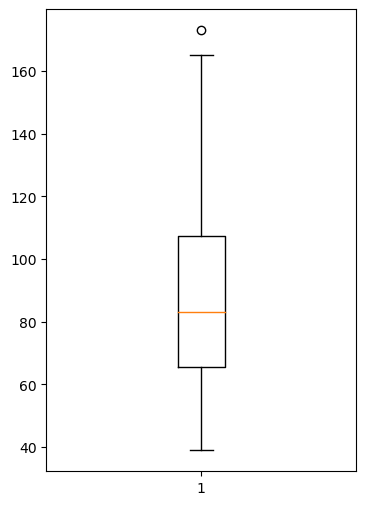

In [2]:
#cargamos los datos de la columna 'Weight'
data= df['Weight']
#Configuramos el tamaño de la figura
fig = plt.figure(figsize =(4,6))
# Creamos el diagrama de caja
plt.boxplot(data)

plt.show()

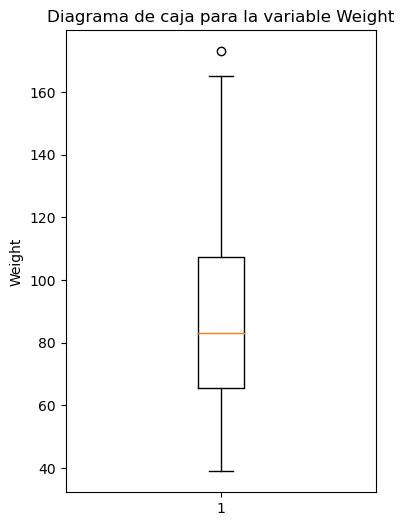

In [3]:
#Podemos añadirle alguna información al gráfico para una mejor lectura. 
#Agregamos al código nuevas instrucciones para crear las etiquetas.

#cargamos los datos de la columna 'Weight'
data= df['Weight']
#Configuramos el tamaño de la figura
fig = plt.figure(figsize =(4,6))
# Creamos el diagrama de caja
plt.boxplot(data)

# Añadir título y etiquetas para los ejes
plt.title('Diagrama de caja para la variable Weight')    # Añade un título al gráfico
plt.ylabel('Weight')                   


plt.show()

Ahora vamos a realizar dos diagramas de cajas, para la variable `Weight`, pero segmentando los datos por el género (`Gender`),   para observar diferencias en los pesos entre hombres y mujeres.

In [4]:
#Filtramos la base de datos para realizar el boxplot por generos

#base de datos filtrada por género femenino
df_female= df[df['Gender']=='Female']

#base de datos filtrada por género masculino
df_male= df[df['Gender']=='Male']

#seleccionamos solamente la columna Weigth de cada dataframe anterior.
data_female = df_female['Weight']
data_male = df_male['Weight']

data_male.describe()

count    1068.000000
mean       90.769478
std        21.407030
min        45.000000
25%        75.000000
50%        89.945470
75%       108.460518
max       173.000000
Name: Weight, dtype: float64

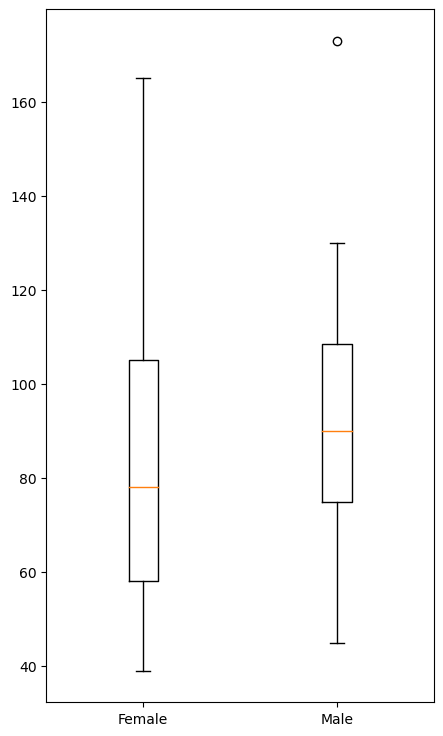

In [5]:
#cargamos los datos filtrados de la columna 'Weight'
data = [data_female, data_male] 

#Configuramos el tamaño de la figura
fig = plt.figure(figsize =(5,9))

# Creamos el diagrama de caja
plt.boxplot(data,labels = ['Female', 'Male'])

plt.show()

En los diagramas de cajas (box plots) proporcionados, hay varias diferencias y características que pueden ser identificadas al comparar el peso de los géneros femenino y masculino:

1. **Mediana**: La línea naranja en cada caja indica la mediana del peso. La mediana en el grupo femenino parece estar alrededor de los 80, mientras que para el grupo masculino está un poco más alta, cerca de los 85. Esto sugiere que la mediana del peso es ligeramente superior en el género masculino.

2. **Rango Intercuartil (IQR)**: La altura de la caja representa el rango intercuartílico, que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). La caja del genero femenino es más larga que la del género masculino, lo que indica una variabilidad mayor  en los pesos dentro del grupo de las mujeres comparada con los hombres.

3. **Rango Total**: Los "bigotes" (las líneas que se extienden desde la parte superior e inferior de cada caja) representan el rango total del peso, excluyendo los valores atípicos. Los bigotes en el grupo femenino se extienden más que en el masculino, lo que indica que hay una mayor dispersión de los datos de peso en las mujeres.

4. **Valores Atípicos**: El círculo por encima del bigote superior en el diagrama de cajas del género femenino representa un valor atípico, indicando que hay al menos una mujer con un peso significativamente más alto que el resto. No hay valores atípicos visibles en el diagrama de cajas masculino.

5. **Simetría**: La caja del grupo masculino parece ser más simétrica respecto a la mediana, mientras que la caja del grupo femenino muestra un leve sesgo hacia los valores más bajos (la mediana está más cerca del primer cuartil que del tercero).

En resumen, mientras que el grupo masculino muestra una mediana más alta, el grupo femenino muestra una mayor dispersión en los pesos y la presencia de valores atípicos en el extremo superior del rango de peso.

## Histograma

Los histogramas son una herramienta para visualizar una gran cantidad de valores únicos en un conjunto de datos de una variable cuantitativa. En esencia, un histograma divide estos valores en intervalos, comúnmente llamados bins o clases, para organizar la información de manera más comprensible. A menudo, estos intervalos tienen el mismo tamaño, pero esta no es una regla estricta.

Cada intervalo está definido por sus límites inferior y superior, conocidos como bordes. La frecuencia es el número de elementos que caen dentro de cada intervalo, proporcionando una medida de cuán comunes son los valores dentro de ese rango. Siguiendo una convención estándar, los intervalos incluyen los valores iguales al límite inferior pero excluyen los valores iguales al límite superior.

La información de frecuencia se representa visualmente mediante las alturas de las barras en el histograma, las cuales se colocan de manera adyacente para facilitar la comparación entre intervalos.

Este tipo de gráfico ofrece una representación clara y visual de cómo se distribuyen los datos a lo largo de los intervalos o clases, lo que permite identificar patrones y tendencias en la variación de los valores presentes en el conjunto de datos.



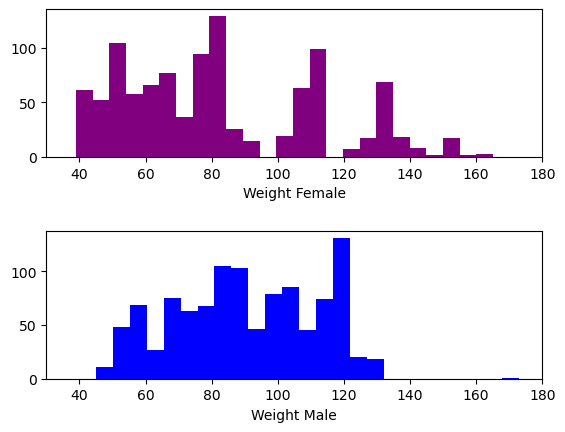

In [6]:


# Realicemos un histograma para la variable peso por cada género.

x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25,color ='purple' )
ax[1].hist(x1,bins=25,color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')
 
plt.subplots_adjust(hspace=0.5)  # Añadimos un espacio entre las dos gráficas

# Establecemos los mismos límites en el eje x para ambos subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


plt.show()

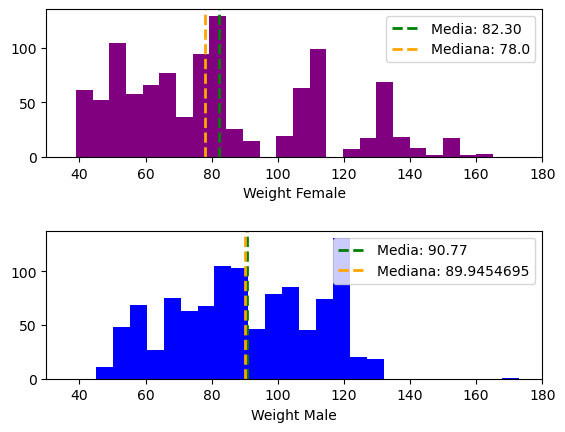

In [7]:
# Agregamos algunas instrucciones al código anterior para poder visualizar la media y la mediana.


x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25,color ='purple' )
ax[1].hist(x1,bins=25,color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')
 
plt.subplots_adjust(hspace=0.5)  # Añadimos un espacio entre las dos gráficas

# Establecemos los mismos límites en el eje x para ambos subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


# Calculamos la media y la mediana
mean_female = np.mean(data_female)
median_female = np.median(data_female)
mean_male = np.mean(data_male)
median_male = np.median(data_male)

# Trazamo líneas verticales para la media y la mediana en el primer subplot
ax[0].axvline(mean_female, color='green', linestyle='dashed', linewidth=2, label=f'Media: {mean_female:.2f}')
ax[0].axvline(median_female, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_female}')
ax[0].legend()

# Trazamosb líneas verticales para la media y la mediana en el segundo subplot
ax[1].axvline(mean_male, color='green', linestyle='dashed', linewidth=2, label=f'Media: {mean_male:.2f}')
ax[1].axvline(median_male, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_male}')
ax[1].legend()

plt.show()

### Interpretación de los histogramas.



- **Media y Mediana:** En ambos histogramas, la línea de trazos verdes representa la media (promedio) del peso, y la línea de trazos naranjas indica la mediana (el valor central en un conjunto de datos ordenados).
  - Para el "Peso Femenino", la media es 82.30 y la mediana es 78.0.
  - Para el "Peso Masculino", la media es 90.77 y la mediana es aproximadamente 89.95.

- **Sesgo:** 
  - El histograma del "Peso Femenino" muestra un sesgo a la derecha (sesgo positivo), ya que la cola del gráfico se extiende más hacia los valores mayores y la media es más alta que la mediana.
  - El histograma del "Peso Masculino" también parece tener un ligero sesgo a la derecha, pero es menos pronunciado en comparación con el femenino, ya que la media y la mediana están más cercanas una de la otra.

- **Simetría:** 
  - Ninguno de los histogramas es perfectamente simétrico. 

- **Dispersión:**
 
  - Basado en la apariencia de los histogramas, parece que el "Peso Femenino" tiene una dispersión ligeramente mayor que el "Peso Masculino" porque sus barras están más esparcidas y hay un rango más amplio de pesos representados.
  - La presencia de pesos más extremos (muy bajos o muy altos) en el histograma femenino también sugiere una mayor dispersión en ese grupo comparado con el masculino.



## Diagrama de dispersión X-Y:

El diagrama de dispersión o gráfico X-Y representa los pares de datos de dos conjuntos de datos. El eje horizontal x muestra los valores del conjunto x, mientras que el eje vertical y muestra los valores correspondientes del conjunto. Opcionalmente, puedes incluir la línea de regresión y el coeficiente de correlación. 

### Ejemplo:

Considere la base datos mencionada desde el inicio, y analicemos si existe alguna relación entre la altura y el peso.


In [12]:
# Identificamos los valores para x,y.
x = df['Height']
y= df['Weight']

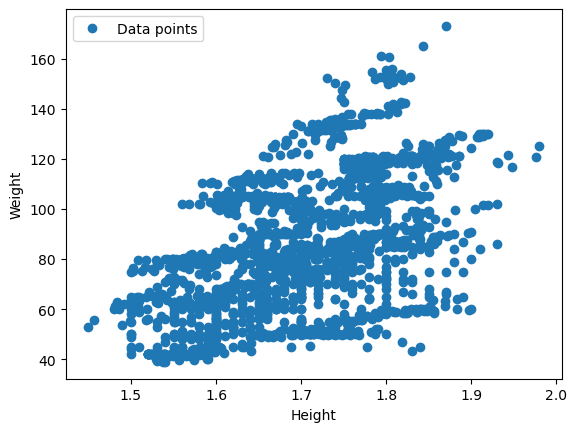

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Data points')
#ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.legend(facecolor='white')
plt.show()

**Lectura de la gráfica:**: Hay una tendencia de que a medida que la altura aumenta, el peso también tiende a aumentar. Esto es común, ya que generalmente las personas más altas tienen un mayor peso corporal.





## Diagrama Circular o de Pastel


Los gráficos de pastel representan datos que tienen un pequeño número de etiquetas a partir de sus frecuencias. Un gráfico de pastel es un círculo dividido en múltiples porciones. Cada porción corresponde a una etiqueta distinta del conjunto de datos y tiene un área proporcional a la frecuencia relativa asociada con esa etiqueta.

In [21]:
# Analicemos la varible Gender y representemos esta variable por medio de un gráfico circular

freq = df['Gender'].value_counts()
freq

Gender
Male      1068
Female    1043
Name: count, dtype: int64

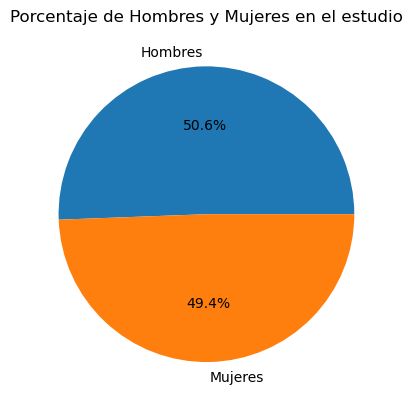

In [40]:
fig, ax = plt.subplots()
ax.pie(freq, labels=('Hombres', 'Mujeres'), autopct='%1.1f%%')
ax.set_title('Porcentaje de Hombres y Mujeres en el estudio')
plt.show()

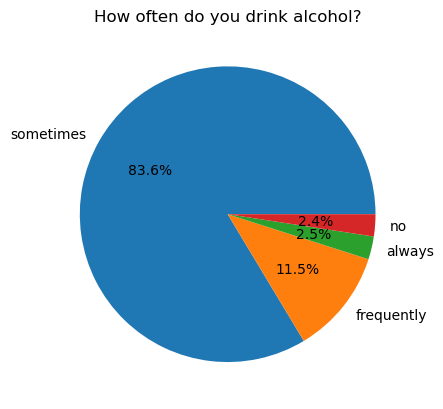

In [62]:
#Quiza es mas conveniente realizar un diagrama circular en el caso de que
#la frecuencia conste de al menos dos clases y menos de 5.
#Tomemos la variable CALC, que corresponde a la pregunta: " How often do you drink alcohol? " y realicemos un diagrama circular.

freq_alcohol = df['CAEC'].value_counts()


fig, ax = plt.subplots()
ax.pie(freq_alcohol, labels= ('sometimes', 'frequently','always','no'), autopct='%1.1f%%')
ax.set_title('How often do you drink alcohol?')
plt.show()

In [61]:
# Del grafico circular observamos que el 83.6% consumen alcohol algunas veces.

### Diagrama de barras

La gráfica de barras es la herramienta más utilizado para representar gráficamente variables cualitativas, donde el eje horizontal indica la variable y el eje vertical muestra la frecuencia de cada categoría. Una característica clave es que las barras están separadas por espacios, reflejando su naturaleza cualitativa. En esencia, se utiliza una serie de rectángulos de igual ancho para representar visualmente la frecuencia de cada categoría en la tabla de frecuencias.

La principal diferencia entre un diagrama de barras y un histograma radica en el tipo de datos que representan: categóricos vs. continuos, y en cómo se presentan las barras en relación con los ejes y entre sí.

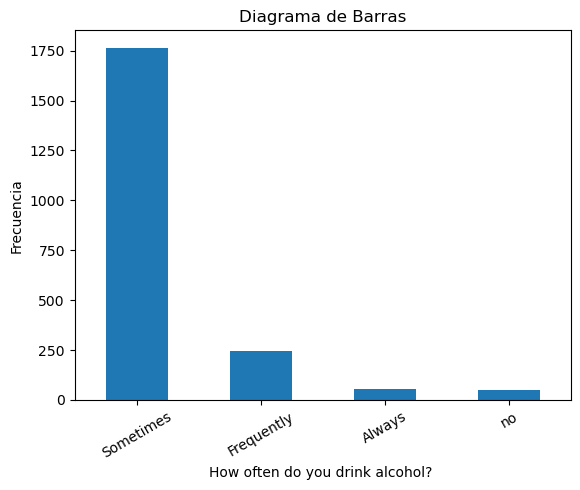

In [73]:
#Tomemos la variable CALC, que corresponde a la pregunta: " How often do you drink alcohol? " 
#y realicemos un diagrama de barras.

freq_alcohol = df['CAEC'].value_counts()


# Luego, creamos el diagrama de barras utilizando estas frecuencias
freq_alcohol.plot(kind='bar')

# Podemos añadir etiquetas y título para mayor claridad
plt.xlabel('How often do you drink alcohol? ')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Barras')
plt.xticks(rotation=30, horizontalalignment="center")

# Finalmente, mostramos la gráfica
plt.show()


In [66]:
freq_alcohol

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64